## Description

Welcome to Weather Prediction repositary by Kunur Archana.This project uses machine Learning for prediction of  tomorrow weather (rainfall) based on today weather report  for the Newspaper Publication "The Weather Oracle". The Weather report includes metrics like temperature, humidity, pressure, and wind speed.

# Problem Statement

-**Context** The Daily Buzz is a newspaper company in syndey found by group of journalists and entrepreneurs who were passionate about providing accurate and trustworthy news.

-**Data Description:** The data set contain the weather report of diiferent days with metircs MinTemp,MaxTemp,Rainfall,Evaporation,sunshine,Humidity,Pressure,cloud,Temp at 2 different points in a day.

-**Classification task:** The primary objective is to perform a calssifiaction task, where the aim is to predict a categorical variable, specifically the does it rain tomorrow or not

## Creating a weather Prediction Model

- **Data Understanding:**
  - Begin by thoroughly understanding the provided dataset, including its structure, columns, and the meaning of each variable. Gain insights into the data's distribution, summary statistics, and potential outliers.
 
- **Data Preprocessing:**
  - Handle Missing Values: Identify and address missing data by imputation or removal, ensuring that data is complete.
  - Outlier Detection and Treatment: Detect and handle outliers in the dataset, which could impact the model's accuracy.
  - Convert Categorical Data: Transform categorical variables (e.g., "Rainfall_Today" and "Rainfall_Tomorrow") into numerical format.

-**Multiple Classification Models**: Applies various machine learning models like Logistic Regression, KNN, Decision Trees, and Ensemble Techniques for rain prediction.

- **Model Training and Evaluation:**
    - Split the dataset into training and testing sets to train the models and assess their performance.
    - Use appropriate evaluation metrics like Accuracy_score,precision_score,roc_auc_score  to measure the model's accuracy.
    - Experiment with different hyperparameters for each model and use cross-validation to avoid overfitting.
 
- **Model Comparison:**
    - Compare the performance of different models and select the one with the best accuracy and generalization.
- **Further Improvement:**
    - Consider additional techniques for model improvement, such as feature engineering, hyperparameter tuning, and ensemble methods.

# The available Classification model options had to perform on this task
#### In the task of predicting Weather report of tommorrow based on today weather report ,there are several machine learning model options available for classsification tasks. The choice of the model depends on various factors, including the nature of the data, the complexity of the problem, and the need for model interpretability. Here are some of the available ML model options:

- **Logistic Regression**
- **Linear Discriminant Analysis(LDA)**
- **KNN Classification**
- **Decision Tree**
- **Ensemble Techniques:**

     Bagging,
  
     Random Forest,
  
     Boosting.

  In all these classification model we will train and fit the data over different params and try to get the best one of it

In [1]:
# Import the pandas library for data manipulation and analysis
# Import the numpy library for numerical operations and array processing
# Import the seaborn library for data visualization

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Read a CSV file into a DataFrame
df= pd.read_csv('C:/Users/kunur/Downloads/sydney_rain prediction.csv',header=0)

In [3]:
# Overview of Data

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-02-2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,02-02-2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,03-02-2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,04-02-2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,05-02-2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [4]:
df.shape

(3337, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3334 non-null   float64
 3   MaxTemp       3335 non-null   float64
 4   Rainfall      3331 non-null   float64
 5   Evaporation   3286 non-null   float64
 6   Sunshine      3321 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Cloud9am      2771 non-null   float64
 12  Cloud3pm      2776 non-null   float64
 13  Temp9am       3333 non-null   float64
 14  Temp3pm       3333 non-null   float64
 15  RainToday     3331 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(4)
memory usage: 443.3+ KB


In [6]:
# Dummy variable
df = pd.get_dummies(df, columns = ["RainToday", "RainTomorrow"], drop_first = True)

In [7]:
for column in df.select_dtypes(include=['bool']):
    df[column] = df[column].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3337 non-null   object 
 1   Location          3337 non-null   object 
 2   MinTemp           3334 non-null   float64
 3   MaxTemp           3335 non-null   float64
 4   Rainfall          3331 non-null   float64
 5   Evaporation       3286 non-null   float64
 6   Sunshine          3321 non-null   float64
 7   Humidity9am       3323 non-null   float64
 8   Humidity3pm       3324 non-null   float64
 9   Pressure9am       3317 non-null   float64
 10  Pressure3pm       3318 non-null   float64
 11  Cloud9am          2771 non-null   float64
 12  Cloud3pm          2776 non-null   float64
 13  Temp9am           3333 non-null   float64
 14  Temp3pm           3333 non-null   float64
 15  RainToday_Yes     3337 non-null   int32  
 16  RainTomorrow_Yes  3337 non-null   int32  


# Replace Null value with Mean and Mode values

In [9]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Replace null values with mean for numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill null values in "RainToday" with the mode
df['RainToday_Yes'].fillna(df['RainToday_Yes'].mode()[0], inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3337 non-null   object 
 1   Location          3337 non-null   object 
 2   MinTemp           3337 non-null   float64
 3   MaxTemp           3337 non-null   float64
 4   Rainfall          3337 non-null   float64
 5   Evaporation       3337 non-null   float64
 6   Sunshine          3337 non-null   float64
 7   Humidity9am       3337 non-null   float64
 8   Humidity3pm       3337 non-null   float64
 9   Pressure9am       3337 non-null   float64
 10  Pressure3pm       3337 non-null   float64
 11  Cloud9am          3337 non-null   float64
 12  Cloud3pm          3337 non-null   float64
 13  Temp9am           3337 non-null   float64
 14  Temp3pm           3337 non-null   float64
 15  RainToday_Yes     3337 non-null   int32  
 16  RainTomorrow_Yes  3337 non-null   int32  


In [11]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,01-02-2008,Sydney,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,02-02-2008,Sydney,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,03-02-2008,Sydney,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,04-02-2008,Sydney,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,05-02-2008,Sydney,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


In [12]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333,0.259515,0.259215
std,4.551593,4.493290,9.886270,2.756095,3.801737,15.053668,16.261752,7.000492,7.012157,2.505491,2.409531,4.894240,4.301156,0.438434,0.438269
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000,0.000000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000


##  Detection of Outliers

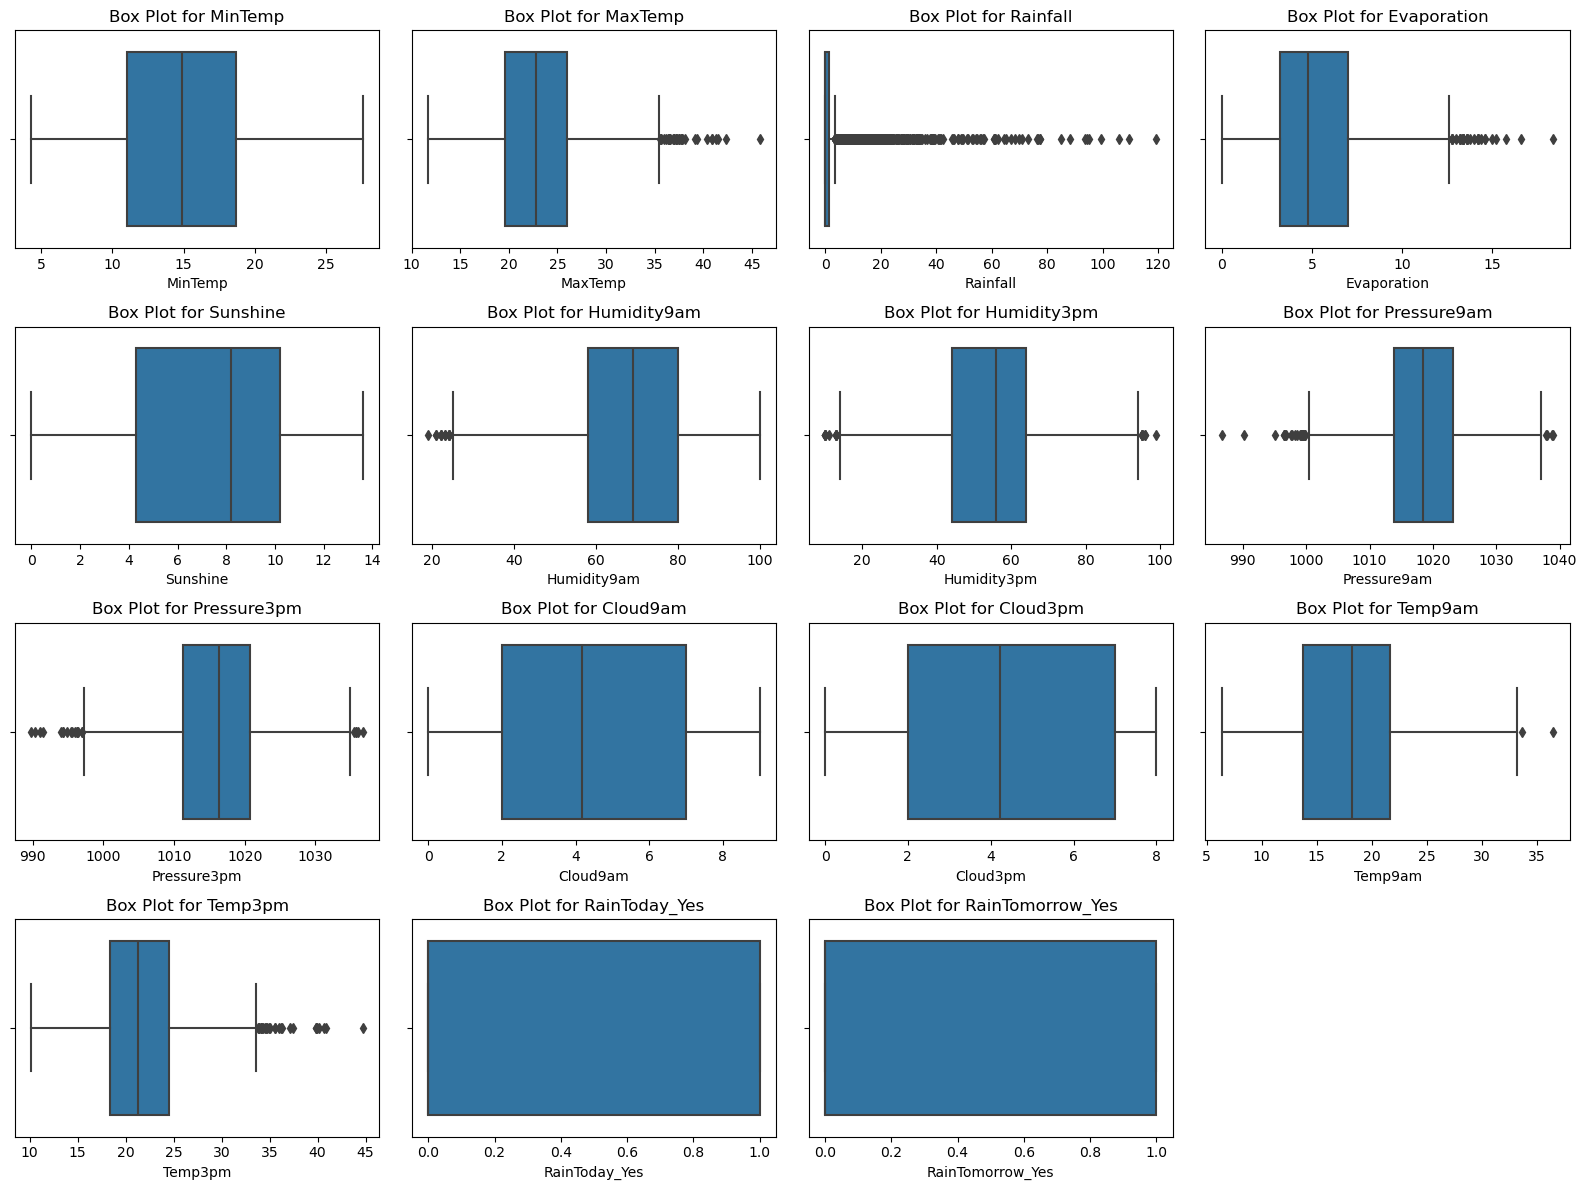

In [13]:
import matplotlib.pyplot as plt


# Select numeric columns for box plots
numeric_cols = df.select_dtypes(include='number').columns

# Create box plots for each numeric column
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()

## outliers in MaxTemp

In [14]:
upper_limit=np.percentile(df.MaxTemp,[99])[0]
upper_limit

35.52799999999998

In [15]:
df[(df.MaxTemp>upper_limit)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
358,24-01-2009,Sydney,24.8,40.9,0.000000,10.6,11.100000,55.00000,20.0,1004.8,1002.8,6.000000,2.00000,31.5,40.1,0,0
641,03-11-2009,Sydney,18.9,36.9,0.000000,6.2,11.000000,73.00000,18.0,1011.9,1006.6,6.000000,6.00000,24.0,36.3,0,0
660,22-11-2009,Sydney,21.2,40.4,0.000000,7.4,6.000000,75.00000,19.0,1005.0,1001.5,6.000000,7.00000,24.0,39.8,0,0
722,23-01-2010,Sydney,25.0,41.3,0.000000,13.4,5.600000,28.00000,17.0,1007.8,1005.4,5.000000,5.00000,31.9,39.9,0,1
742,12-02-2010,Sydney,23.9,37.8,0.000000,9.0,9.800000,71.00000,32.0,1008.7,1005.5,6.000000,7.00000,26.9,37.4,0,1
1095,03-02-2011,Sydney,25.1,37.5,0.000000,10.2,5.700000,58.00000,54.0,1011.0,1009.9,4.181523,4.21866,30.6,33.6,0,0
1097,05-02-2011,Sydney,24.2,41.5,0.000000,8.4,12.400000,46.00000,22.0,1010.0,1006.6,4.181523,4.21866,33.7,40.9,0,0
1098,06-02-2011,Sydney,27.6,35.6,0.000000,16.6,2.600000,56.00000,77.0,1012.7,1016.1,4.181523,4.21866,28.7,22.8,0,0
1349,14-11-2011,Sydney,19.8,37.2,0.000000,4.4,9.700000,68.22901,23.0,1009.5,1004.9,4.181523,4.21866,26.2,34.9,0,0
1739,08-01-2013,Sydney,20.9,42.3,0.000000,9.8,8.700000,52.00000,14.0,1005.8,999.1,6.000000,6.00000,27.3,39.8,0,0


In [16]:
df[(df.MaxTemp>3*upper_limit)]=3*upper_limit

As seen above, these are some outliers in "MaxTemp" column but they are not as extreme that can make any huge difference while making prediction. Therefore in my opinion keeping those outliers into data is more useful than removing.

## outliers in Rainfall

In [17]:
import pandas as pd

# Calculate IQR for the 'rainfall' column
Q1 = df['Rainfall'].quantile(0.25)
Q3 = df['Rainfall'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping/flooring outliers in the 'rainfall' column
df['Rainfall'] = df['Rainfall'].clip(lower=lower_bound, upper=upper_bound)

# Filter out all outliers in the entire dataframe
# Uncomment the next line if you want to filter out rows with any outliers in any column
# df_no_outliers = df[~((df < (df.quantile(0.25) - 1.5 * (df.quantile(0.75) - df.quantile(0.25)))) | (df > (df.quantile(0.75) + 1.5 * (df.quantile(0.75) - df.quantile(0.25))))).any(axis=1)]

# If you want to see the effect of capping
original_stats = df.describe()
capped_stats = df.describe()

original_stats.loc[:, ['Rainfall']], capped_stats.loc[:, ['Rainfall']]

(          Rainfall
 count  3337.000000
 mean      0.868919
 std       1.393618
 min       0.000000
 25%       0.000000
 50%       0.000000
 75%       1.400000
 max       3.500000,
           Rainfall
 count  3337.000000
 mean      0.868919
 std       1.393618
 min       0.000000
 25%       0.000000
 50%       0.000000
 75%       1.400000
 max       3.500000)

<Axes: >

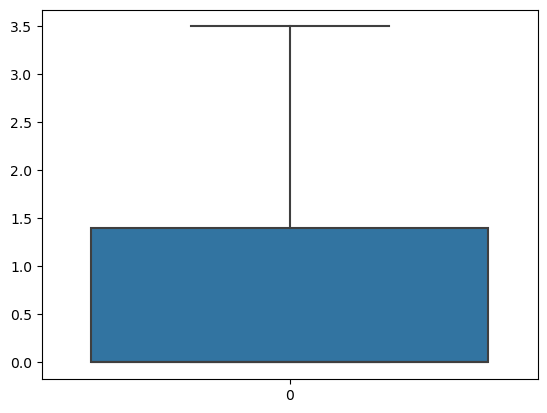

In [18]:
sns.boxplot(df['Rainfall'])

## outliers in Evaporation

In [19]:
upper_limit=np.percentile(df.Evaporation,[99])[0]
upper_limit

12.8

In [20]:
df[(df.Evaporation>upper_limit)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
349,15-01-2009,Sydney,23.0,33.4,0.0,14.2,9.400000,61.0,39.0,1009.1,1006.0,4.181523,6.00000,28.6,33.1,0,1
357,23-01-2009,Sydney,25.0,31.7,0.0,14.2,11.900000,59.0,58.0,1009.2,1007.6,1.000000,2.00000,29.5,29.1,0,0
359,25-01-2009,Sydney,20.5,25.9,0.0,13.6,6.800000,57.0,51.0,1019.5,1018.3,7.000000,5.00000,21.9,24.7,0,0
373,08-02-2009,Sydney,21.4,28.6,0.0,14.2,12.200000,69.0,53.0,1010.8,1007.5,0.000000,1.00000,24.2,28.1,0,0
642,04-11-2009,Sydney,19.4,19.9,0.0,13.2,0.000000,71.0,76.0,1017.9,1015.5,8.000000,8.00000,19.7,19.1,0,0
661,23-11-2009,Sydney,19.9,22.8,0.0,13.4,0.300000,62.0,68.0,1021.0,1022.6,7.000000,8.00000,21.4,20.4,0,0
686,18-12-2009,Sydney,20.2,21.4,3.5,13.6,0.000000,87.0,83.0,1014.1,1016.7,8.000000,8.00000,20.2,18.5,1,1
722,23-01-2010,Sydney,25.0,41.3,0.0,13.4,5.600000,28.0,17.0,1007.8,1005.4,5.000000,5.00000,31.9,39.9,0,1
1098,06-02-2011,Sydney,27.6,35.6,0.0,16.6,2.600000,56.0,77.0,1012.7,1016.1,4.181523,4.21866,28.7,22.8,0,0
1400,04-01-2012,Sydney,20.7,29.4,0.0,13.4,8.400000,69.0,59.0,1012.6,1010.2,4.181523,4.21866,25.0,27.8,0,0


As seen above, these are some outliers in "Evaporation" column but they are not as extreme that can make any huge difference while making prediction. Therefore in my opinion keeping those outliers into data is more useful than removing.

### Conclusion on detection of Outliers:
- There were as such no extreme outliers present in our dataset that can make any huge difference in machine learning model. Also from describe function it is clear that there is no extreme outliers.
- As seen above in "MaxTemp"and "Evaporation", there are some outliers but from my perspective these are not going to affect my model.
- Also we have fixed outliers in "Rainfall" in the above

In [21]:
del df['Date']

In [22]:
del df['Location']

In [23]:
corr=df.corr()
corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
MinTemp,1.000000,0.770701,0.023171,0.567623,-0.062959,0.052362,0.270944,-0.393024,-0.355764,0.236288,0.163519,0.938814,0.752410,0.018690,0.079962
MaxTemp,0.770701,1.000000,-0.188066,0.509060,0.325107,-0.186875,-0.152310,-0.388533,-0.424653,-0.087381,-0.099167,0.858986,0.960026,-0.188334,-0.149269
Rainfall,0.023171,-0.188066,1.000000,-0.233425,-0.375991,0.417955,0.354366,-0.008908,0.051863,0.329424,0.263782,-0.072486,-0.189739,0.953486,0.358048
Evaporation,0.567623,0.509060,-0.233425,1.000000,0.174467,-0.394166,-0.101849,-0.345700,-0.300285,-0.037598,-0.037739,0.605348,0.473879,-0.228791,-0.064301
Sunshine,-0.062959,0.325107,-0.375991,0.174467,1.000000,-0.489019,-0.582792,-0.046391,-0.094322,-0.660555,-0.676397,0.114663,0.343563,-0.367080,-0.521637
Humidity9am,0.052362,-0.186875,0.417955,-0.394166,-0.489019,1.000000,0.658120,0.263146,0.251304,0.423560,0.331734,-0.147977,-0.157149,0.400603,0.329011
Humidity3pm,0.270944,-0.152310,0.354366,-0.101849,-0.582792,0.658120,1.000000,0.154352,0.183056,0.453697,0.471684,0.128479,-0.213727,0.342936,0.471250
Pressure9am,-0.393024,-0.388533,-0.008908,-0.345700,-0.046391,0.263146,0.154352,1.000000,0.960460,-0.011072,-0.040115,-0.418943,-0.345926,-0.000113,-0.032465
Pressure3pm,-0.355764,-0.424653,0.051863,-0.300285,-0.094322,0.251304,0.183056,0.960460,1.000000,0.018972,-0.002903,-0.404472,-0.392218,0.056978,0.010977
Cloud9am,0.236288,-0.087381,0.329424,-0.037598,-0.660555,0.423560,0.453697,-0.011072,0.018972,1.000000,0.608995,0.088428,-0.089334,0.316502,0.329525


<Axes: >

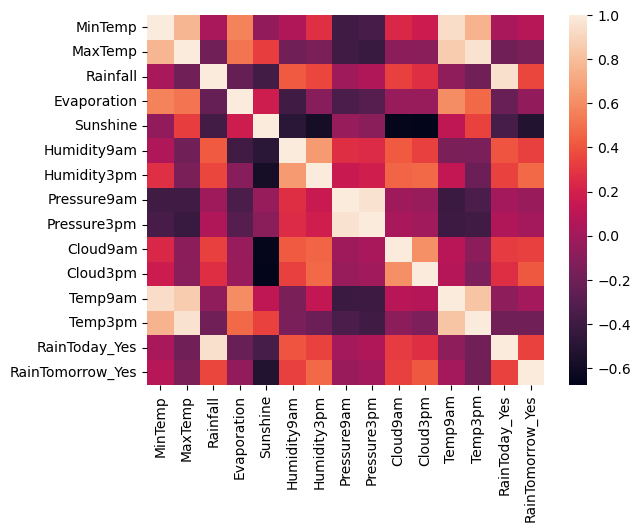

In [24]:
# Visual representation of corr
# Heatmap
sns.heatmap(data=corr)

## Train  -Test Split

In [25]:
X_multi = df.loc[:,df.columns !='RainTomorrow_Yes']
y_multi = df['RainTomorrow_Yes']

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=0)

In [26]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2669, 14) (668, 14) (2669,) (668,)


# Classification Models

## Multiple Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import roc_auc_score
 
# Create a logistic regression model
clf_lr=LogisticRegression()

# Fit the model to the training data
clf_lr.fit(X_train,y_train)

#Predict Values

y_train_pred1=clf_lr.predict(X_train)
y_test_pred1=clf_lr.predict(X_test)


#Model Performance 

cfm_train_ct = confusion_matrix(y_train, y_train_pred1)
cfm_test_ct = confusion_matrix(y_test, y_test_pred1)
acs_train_ct = accuracy_score(y_train, y_train_pred1)
acs_test_ct = accuracy_score(y_test, y_test_pred1)
pcs_train_ct = precision_score(y_train, y_train_pred1)
pcs_test_ct = precision_score(y_test, y_test_pred1)
rcs_train_ct = recall_score(y_train, y_train_pred1)
rcs_test_ct = recall_score(y_test, y_test_pred1)
roc_auc_score_train = roc_auc_score(y_train, y_train_pred1)
roc_auc_score_test = roc_auc_score(y_test,y_test_pred1)

#Print the result 
# Print the confusion matrix and accuracy score for training data
print("Confusion Matrix (Training Data):")
print(cfm_train_ct)

print("\nAccuracy Score (Training Data):", acs_train_ct)
print("\nPrecision Score (Training Data):", pcs_train_ct)
print("\nRecall Score (Training Data):", rcs_train_ct)
print("\nROC AUC Score (Training Data):", roc_auc_score_train)

print("\n------------------------------------------------------")
# Print the confusion matrix and accuracy score for testing data
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_ct)

print("\nAccuracy Score (Testing Data):", acs_test_ct)
print("\nPrecision Score (Test Data):", pcs_test_ct)
print("\nRecall Score (Test Data):", rcs_test_ct)
print("\nROC AUC Score (Test Data):", roc_auc_score_test)
print("\n------------------------------------------------------")





Confusion Matrix (Training Data):
[[1819  143]
 [ 295  412]]

Accuracy Score (Training Data): 0.8358935931060322

Precision Score (Training Data): 0.7423423423423423

Recall Score (Training Data): 0.5827439886845828

ROC AUC Score (Training Data): 0.7549295886338308

------------------------------------------------------

Confusion Matrix (Testing Data):
[[475  35]
 [ 75  83]]

Accuracy Score (Testing Data): 0.8353293413173652

Precision Score (Test Data): 0.7033898305084746

Recall Score (Test Data): 0.5253164556962026

ROC AUC Score (Test Data): 0.7283445023579053

------------------------------------------------------


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Linear Discriminant Model

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# create a LDA Model
clf_lda=LinearDiscriminantAnalysis()

# Fit the model to training dataset
clf_lda.fit(X_train,y_train)#Predict Values

y_train_pred=clf_lr.predict(X_train)
y_test_pred=clf_lr.predict(X_test)

#Predict Values

y_train_pred2=clf_lda.predict(X_train)
y_test_pred2=clf_lda.predict(X_test)

#Model Performance 

cfm_train_ct = confusion_matrix(y_train, y_train_pred2)
cfm_test_ct = confusion_matrix(y_test, y_test_pred2)
acs_train_ct = accuracy_score(y_train, y_train_pred2)
acs_test_ct = accuracy_score(y_test, y_test_pred2)
pcs_train_ct = precision_score(y_train, y_train_pred2)
pcs_test_ct = precision_score(y_test, y_test_pred2)
rcs_train_ct = recall_score(y_train, y_train_pred2)
rcs_test_ct = recall_score(y_test, y_test_pred2)
roc_auc_score_train = roc_auc_score(y_train, y_train_pred2)
roc_auc_score_test = roc_auc_score(y_test,y_test_pred2)

#Print the result 
# Print the confusion matrix and accuracy score for training data
print("Confusion Matrix (Training Data):")
print(cfm_train_ct)

print("\nAccuracy Score (Training Data):", acs_train_ct)
print("\nPrecision Score (Training Data):", pcs_train_ct)
print("\nRecall Score (Training Data):", rcs_train_ct)
print("\nROC AUC Score (Training Data):", roc_auc_score_train)

print("\n------------------------------------------------------")
# Print the confusion matrix and accuracy score for testing data
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_ct)

print("\nAccuracy Score (Testing Data):", acs_test_ct)
print("\nPrecision Score (Test Data):", pcs_test_ct)
print("\nRecall Score (Test Data):", rcs_test_ct)
print("\nROC AUC Score (Test Data):", roc_auc_score_test)
print("\n------------------------------------------------------")








Confusion Matrix (Training Data):
[[1797  165]
 [ 285  422]]

Accuracy Score (Training Data): 0.8313975271637317

Precision Score (Training Data): 0.7189097103918228

Recall Score (Training Data): 0.5968882602545968

ROC AUC Score (Training Data): 0.7563952004636898

------------------------------------------------------

Confusion Matrix (Testing Data):
[[470  40]
 [ 67  91]]

Accuracy Score (Testing Data): 0.8398203592814372

Precision Score (Test Data): 0.6946564885496184

Recall Score (Test Data): 0.5759493670886076

ROC AUC Score (Test Data): 0.748758997269794

------------------------------------------------------


# KNN Classifier

In [29]:
from sklearn import preprocessing
scaler1=preprocessing.StandardScaler().fit(X_train)
X_train_s=scaler1.transform(X_train)


scaler2=preprocessing.StandardScaler().fit(X_test)
X_test_s=scaler2.transform(X_test)


### KNN with n_neighbours =1

In [30]:


from sklearn.neighbors import KNeighborsClassifier
clf_knn_1 = KNeighborsClassifier(n_neighbors=1)
clf_knn_1.fit(X_train_s, y_train)

# Confusion Matrix
print("Confusion_matrix: \n", confusion_matrix(y_test, clf_knn_1.predict(X_test_s)))

# Accuracy Score
print("\nAccuracy_score:",accuracy_score(y_test, clf_knn_1.predict(X_test_s))) 

precision_Score=precision_score(y_test,y_test_pred4)
print("\n precision_score:",precision_score)



roc_score=roc_auc_score(y_test,y_test_pred4)
print("\n roc_auc_score:",roc_score)

Confusion_matrix: 
 [[418  92]
 [ 77  81]]

Accuracy_score: 0.7470059880239521


## n_neighbors with Grid search

In [31]:
from sklearn.model_selection import GridSearchCV

# creating a data dictionary for values of k
params={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

#using GridsearchCV with params
grid_search_cv=GridSearchCV(KNeighborsClassifier(),params)

# fitting the model for all the params
grid_search_cv.fit(X_train,y_train)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [32]:
# finding the best parameter

print("best_param:",grid_search_cv.best_params_)

optimised_KNN = grid_search_cv.best_estimator_

#predicting the values
y_test_pred3=optimised_KNN.predict(X_test_s)


# Confusion Matrix
print("\n Confusion_matrix: \n", confusion_matrix(y_test, y_test_pred3))

# Accuracy Score
print("\nAccuracy_score:",accuracy_score(y_test, y_test_pred3)) 




best_param: {'n_neighbors': 10}

 Confusion_matrix: 
 [[510   0]
 [158   0]]

Accuracy_score: 0.7634730538922155


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Decision Tree Classifier

In [33]:
import pydotplus

In [34]:
import graphviz

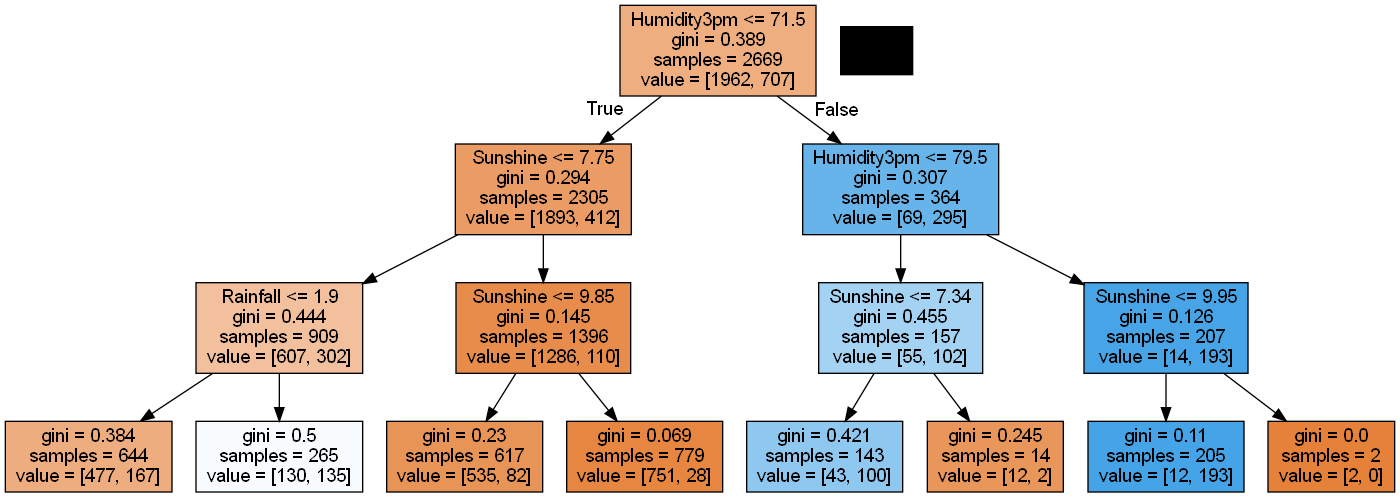

In [35]:
from sklearn import tree
from IPython.display import Image
from sklearn.metrics import classification_report

# using maxdepth of 3
clstree=tree.DecisionTreeClassifier(max_depth=3)
clstree.fit(X_train,y_train)

#predicting values using trained model
y_train_pred4=clstree.predict(X_train)
y_test_pred4=clstree.predict(X_test)



dot_data = tree.export_graphviz(clstree, out_file=None,feature_names= X_train.columns, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


## Model Performance

In [36]:
accuracy=accuracy_score(y_train,y_train_pred4)
print("accuracy_score of training data:", accuracy)

print("\n metrics of test data:")
accuracy_test=accuracy_score(y_test,y_test_pred4)
print("\n accuracy_score :", accuracy_test)

precision_Score=precision_score(y_test,y_test_pred4)
print("\n precision_score:",precision_score)

roc_score=roc_auc_score(y_test,y_test_pred4)
print("\n roc_auc_score:",roc_score)

classification_report=classification_report(y_test,y_test_pred4)
print("\n classification_report:")
print(classification_report)


accuracy_score of training data: 0.8261521168977145

 metrics of test data:

 accuracy_score : 0.811377245508982

 precision_score: <function precision_score at 0x000002939BA29080>

 roc_auc_score: 0.7170265574584264

 classification_report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       510
           1       0.62      0.54      0.57       158

    accuracy                           0.81       668
   macro avg       0.74      0.72      0.73       668
weighted avg       0.80      0.81      0.81       668



## Controlling Tree Growth

 we control tree growth by pruning a tree. it consists of different methods like "max_depth","min_samples_split","min_samples_leaf". and also using gridsearchcv

In [37]:
clf_tree1=tree.DecisionTreeClassifier()
param_grid={"max_depth":[3,4,5],
            "min_samples_split":[40,41,42,43,44,45,46,47,48,49],
            "min_samples_leaf":[23,24,25,26,27,28,29,30]}
grid_search=GridSearchCV(clf_tree1,param_grid,scoring='accuracy')
grid_search.fit(X_train,y_train)

#finding best parameter
best_param=grid_search.best_params_

print("\n best parameter is",best_param)

#best estimator
cv_clf=grid_search.best_estimator_


print("\n best estimator is",cv_clf)

accuracy=accuracy_score(y_test,cv_clf.predict(X_test))
print("\n Accuracy_score at best estimator is",accuracy)

precision_Score=precision_score(y_test,cv_clf.predict(X_test))
print("\n precision_score:",precision_score)

roc_score=roc_auc_score(y_test,cv_clf.predict(X_test))
print("\n roc_auc_score:",roc_score)



 best parameter is {'max_depth': 4, 'min_samples_leaf': 27, 'min_samples_split': 40}

 best estimator is DecisionTreeClassifier(max_depth=4, min_samples_leaf=27, min_samples_split=40)

 Accuracy_score at best estimator is 0.8233532934131736

 precision_score: <function precision_score at 0x000002939BA29080>

 roc_auc_score: 0.6877388930255647


# Bagging

In [38]:
clftree3 = tree.DecisionTreeClassifier()
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(base_estimator=clftree3, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)
bag_clf.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

### Model performance after baggging

In [39]:
# Trainng data 
acc_train_bag = accuracy_score(y_train, bag_clf.predict(X_train))
print("Training Data Metrics:")
print('Accuracy: ', acc_train_bag)

# Testing data 
print("\nTesting Data Metrics:")


accuracy=accuracy_score(y_test,bag_clf.predict(X_test))
print("\n Accuracy_score at best estimator is",accuracy)

precision_Score=precision_score(y_test,bag_clf.predict(X_test))
print("\n precision_score:",precision_score)

roc_score=roc_auc_score(y_test,bag_clf.predict(X_test))
print("\n roc_auc_score:",roc_score)


Training Data Metrics:
Accuracy:  1.0

Testing Data Metrics:

 Accuracy_score at best estimator is 0.8188622754491018

 precision_score: <function precision_score at 0x000002939BA29080>

 roc_auc_score: 0.7110076942169272


# Random forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

print("Training metrics:\n")
accuracy=accuracy_score(y_test,rf_clf.predict(X_test))
print(" Accuarcy_score:",accuracy)

print("\n Testing metrics:")

accuracy=accuracy_score(y_test,rf_clf.predict(X_test))
print(" \n Accuracy_score at best estimator is",accuracy)

precision_Score=precision_score(y_test,rf_clf.predict(X_test))
print("\n precision_score:",precision_score)



roc_score=roc_auc_score(y_test,rf_clf.predict(X_test))
print("\n roc_auc_score:",roc_score)



print("Training metrics:\n")
accuracy=accuracy_score(y_test,rf_clf.predict(X_test))
print(" Accuarcy_score:",accuracy)

print("\n Testing metrics:")

accuracy=accuracy_score(y_test,rf_clf.predict(X_test))
print(" \n Accuracy_score at best estimator is",accuracy)

precision_Score=precision_score(y_test,rf_clf.predict(X_test))
print("\n precision_score:",precision_score)



roc_score=roc_auc_score(y_test,rf_clf.predict(X_test))
print("\n roc_auc_score:",roc_score)



In [41]:
print("Training metrics:\n")
accuracy=accuracy_score(y_test,rf_clf.predict(X_test))
print(" Accuarcy_score:",accuracy)

print("\n Testing metrics:")

accuracy=accuracy_score(y_test,rf_clf.predict(X_test))
print(" \n Accuracy_score at best estimator is",accuracy)

precision_Score=precision_score(y_test,rf_clf.predict(X_test))
print("\n precision_score:",precision_score)

roc_score=roc_auc_score(y_test,rf_clf.predict(X_test))
print("\n roc_auc_score:",roc_score)

Training metrics:

 Accuarcy_score: 0.8398203592814372

 Testing metrics:
 
 Accuracy_score at best estimator is 0.8398203592814372

 precision_score: <function precision_score at 0x000002939BA29080>

 roc_auc_score: 0.7247331844130057


### Grid Search

In [42]:
from sklearn.model_selection import GridSearchCV
rf_clf_grid = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)
params_grid = {"max_features" : [4,5,6,7,8,9,10],
              "min_samples_split": [2, 3, 6, 10],}
grid_search = GridSearchCV(rf_clf_grid, params_grid,
                           n_jobs=-1, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=1000, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 6, 10]},
             scoring='accuracy')

In [43]:
grid_search.best_params_
cvrf_clf = grid_search.best_estimator_
print("best_params:",cvrf_clf)

best_params: RandomForestClassifier(max_features=9, min_samples_split=10, n_estimators=1000,
                       n_jobs=-1, random_state=42)


### Model Performance after Grid search

In [44]:
print("Training metrics:\n")
accuracy=accuracy_score(y_test,cvrf_clf.predict(X_test))
print(" Accuarcy_score:",accuracy)

print("\n Testing metrics:")

accuracy=accuracy_score(y_test,cvrf_clf.predict(X_test))
print(" \n Accuracy_score at best estimator is",accuracy)

precision_Score=precision_score(y_test,cvrf_clf.predict(X_test))
print("\n precision_score:",precision_score)

roc_score=roc_auc_score(y_test,cvrf_clf.predict(X_test))
print("\n roc_auc_score:",roc_score)


Training metrics:

 Accuarcy_score: 0.8248502994011976

 Testing metrics:
 
 Accuracy_score at best estimator is 0.8248502994011976

 precision_score: <function precision_score at 0x000002939BA29080>

 roc_auc_score: 0.7149292628443783


## Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier(n_estimators=1000,
                                     max_features=6,
                                     min_samples_split=2,
                                     random_state=42)
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_features=6, n_estimators=1000, random_state=42)

### Model Performance

In [46]:


print("Training metrics:\n")
accuracy=accuracy_score(y_test,gbc_clf.predict(X_test))
print(" Accuarcy_score:",accuracy)

print("\n Testing metrics:")

accuracy=accuracy_score(y_test,gbc_clf.predict(X_test))
print(" \n Accuracy_score at best estimator is",accuracy)

precision_Score=precision_score(y_test,gbc_clf.predict(X_test))
print("\n precision_score:",precision_score)

roc_score=roc_auc_score(y_test,gbc_clf.predict(X_test))
print("\n roc_auc_score:",roc_score)

Training metrics:

 Accuarcy_score: 0.8473053892215568

 Testing metrics:
 
 Accuracy_score at best estimator is 0.8473053892215568

 precision_score: <function precision_score at 0x000002939BA29080>

 roc_auc_score: 0.7514767932489451


#### Gradient Boosting using Different Parameters

In [47]:
gbc_clf2 = GradientBoostingClassifier(learning_rate =0.02, n_estimators =1000, max_depth = 1)
gbc_clf2.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [48]:
# performance metrics with different parameters
print("Training metrics:\n")
accuracy=accuracy_score(y_test,gbc_clf2.predict(X_test))
print(" Accuarcy_score:",accuracy)

print("\n Testing metrics:")

accuracy=accuracy_score(y_test,gbc_clf2.predict(X_test))
print(" \n Accuracy_score at best estimator is",accuracy)

precision_Score=precision_score(y_test,gbc_clf2.predict(X_test))
print("\n precision_score:",precision_score)

roc_score=roc_auc_score(y_test,gbc_clf2.predict(X_test))
print("\n roc_auc_score:",roc_score)

Training metrics:

 Accuarcy_score: 0.844311377245509

 Testing metrics:
 
 Accuracy_score at best estimator is 0.844311377245509

 precision_score: <function precision_score at 0x000002939BA29080>

 roc_auc_score: 0.7276743608835939


## GB Using Grid Search

In [49]:
gbc_clf_grid = GradientBoostingClassifier(loss='log_loss',
                                          criterion='friedman_mse',
                                          random_state=42)
params_grid_gbc = {"learning_rate": np.arange(0.01,0.11,0.01),
                   "n_estimators" : [500,550,600,650,700,850],
                   "max_depth": [1,2,3,4,5],}
grid_search_gbc = GridSearchCV(gbc_clf_grid, params_grid_gbc,
                           n_jobs=-1, cv=5, scoring='accuracy')
grid_search_gbc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [500, 550, 600, 650, 700, 850]},
             scoring='accuracy')

In [50]:
best_params=grid_search_gbc.best_params_
print("Best Parameters is:",best_params)

cvgbc_clf = grid_search_gbc.best_estimator_


Best Parameters is: {'learning_rate': 0.09999999999999999, 'max_depth': 1, 'n_estimators': 600}


#### Model performance after Grid Search

In [51]:
print("Training metrics:\n")
accuracy=accuracy_score(y_test,cvgbc_clf.predict(X_test))
print(" Accuarcy_score:",accuracy)

print("\n Testing metrics:")

accuracy=accuracy_score(y_test,cvgbc_clf.predict(X_test))
print(" \n Accuracy_score at best estimator is",accuracy)

precision_Score=precision_score(y_test,cvgbc_clf.predict(X_test))
print("\n precision_score:",precision_score)

roc_score=roc_auc_score(y_test,cvgbc_clf.predict(X_test))
print("\n roc_auc_score:",roc_score)

Training metrics:

 Accuarcy_score: 0.842814371257485

 Testing metrics:
 
 Accuracy_score at best estimator is 0.842814371257485

 precision_score: <function precision_score at 0x000002939BA29080>

 roc_auc_score: 0.7354306279473815


## ADA Boost

In [52]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(learning_rate =0.02, n_estimators =5000)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

#### Model performance 

In [53]:
print("Training metrics:\n")
accuracy=accuracy_score(y_test,ada_clf.predict(X_test))
print(" Accuarcy_score:",accuracy)

print("\n Testing metrics:")

accuracy=accuracy_score(y_test,ada_clf.predict(X_test))
print(" \n Accuracy_score at best estimator is",accuracy)

precision_Score=precision_score(y_test,ada_clf.predict(X_test))
print("\n precision_score:",precision_score)

roc_score=roc_auc_score(y_test,ada_clf.predict(X_test))
print("\n roc_auc_score:",roc_score)

Training metrics:

 Accuarcy_score: 0.8398203592814372

 Testing metrics:
 
 Accuracy_score at best estimator is 0.8398203592814372

 precision_score: <function precision_score at 0x000002939BA29080>

 roc_auc_score: 0.7247331844130057


#### Using Grid Search with different parameters

In [57]:
from sklearn.tree import DecisionTreeClassifier
# Define the base estimator
base_estimator = DecisionTreeClassifier(max_depth=2)  # You can experiment with different depths

# Define the AdaBoost model with the new base estimator
ada_clf_grid = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Reduce the number of estimators
params_grid_ada = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.001, 0.01, 0.02, 0.05, 0.1]
}

# Perform grid search
grid_search_ada = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), random_state=42), 
                               params_grid_ada, n_jobs=-1, cv=5, scoring='accuracy')
grid_search_ada.fit(X_train, y_train)

# Get the best model
print('Best Params: ', grid_search_ada.best_params_)
cv_ada_clf = grid_search_ada.best_estimator_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Params:  {'learning_rate': 0.02, 'n_estimators': 200}


#### Performance Metrics

In [55]:
print("Training metrics:\n")
accuracy=accuracy_score(y_test,cv_ada_clf.predict(X_test))
print(" Accuarcy_score:",accuracy)

print("\n Testing metrics:")

accuracy=accuracy_score(y_test,cv_ada_clf.predict(X_test))
print(" \n Accuracy_score at best estimator is",accuracy)

precision_Score=precision_score(y_test,cv_ada_clf.predict(X_test))
print("\n precision_score:",precision_score)

roc_score=roc_auc_score(y_test,cv_ada_clf.predict(X_test))
print("\n roc_auc_score:",roc_score)

Training metrics:

 Accuarcy_score: 0.8413173652694611

 Testing metrics:
 
 Accuracy_score at best estimator is 0.8413173652694611

 precision_score: <function precision_score at 0x000002939BA29080>

 roc_auc_score: 0.7016877637130803


## XG Boosting

In [61]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,
                            n_jobs=-1, random_state=42)
xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10000, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [62]:
print("Training metrics:\n")
accuracy=accuracy_score(y_test,xgb_clf.predict(X_test))
print(" Accuarcy_score:",accuracy)

print("\n Testing metrics:")

accuracy=accuracy_score(y_test,xgb_clf.predict(X_test))
print(" \n Accuracy_score at best estimator is",accuracy)

precision_Score=precision_score(y_test,xgb_clf.predict(X_test))
print("\n precision_score:",precision_score)

roc_score=roc_auc_score(y_test,xgb_clf.predict(X_test))
print("\n roc_auc_score:",roc_score)

Training metrics:

 Accuarcy_score: 0.8398203592814372

 Testing metrics:
 
 Accuracy_score at best estimator is 0.8398203592814372

 precision_score: <function precision_score at 0x000002939BA29080>

 roc_auc_score: 0.7400223380491437


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

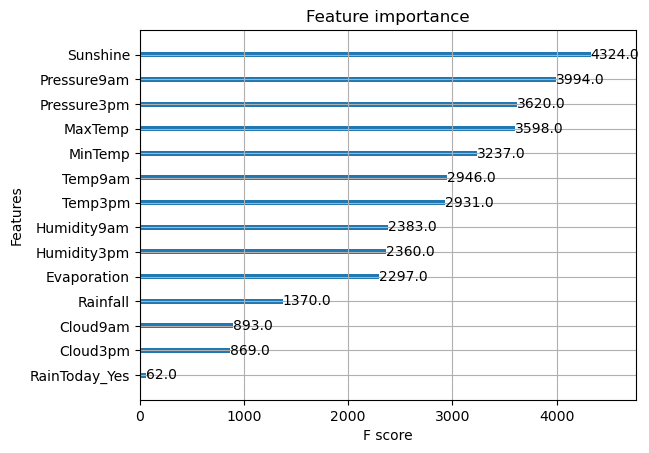

In [63]:
xgb.plot_importance(xgb_clf)

### XG Boost with Grid search

In [65]:
xgb_clf = xgb.XGBClassifier(n_estimators=250,learning_rate=0.1, random_state=42)
param_test1 = {
 'max_depth':range(3,10,2),
    'gamma' : [0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[ 1e-2, 0.1, 1]
}

grid_search = GridSearchCV(xgb_clf, param_test1,
                           n_jobs=-1, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=250,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

#### Performance Metrics

In [67]:
cvxgb_clf = grid_search.best_estimator_
print("The Best estimator is at:",cvxgb_clf)


The Best estimator is at: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [68]:
print("Training metrics:\n")
accuracy=accuracy_score(y_test,cvxgb_clf.predict(X_test))
print(" Accuarcy_score:",accuracy)

print("\n Testing metrics:")

accuracy=accuracy_score(y_test,cvxgb_clf.predict(X_test))
print(" \n Accuracy_score at best estimator is",accuracy)

precision_Score=precision_score(y_test,cvxgb_clf.predict(X_test))
print("\n precision_score:",precision_score)

roc_score=roc_auc_score(y_test,cvxgb_clf.predict(X_test))
print("\n roc_auc_score:",roc_score)

Training metrics:

 Accuarcy_score: 0.844311377245509

 Testing metrics:
 
 Accuracy_score at best estimator is 0.844311377245509

 precision_score: <function precision_score at 0x000002939BA29080>

 roc_auc_score: 0.7320426904939191


##### To Compare the Performance of different Machine Learning models, we'll focus of Accuracy(accuracy_score) which represents the overall correctness of model's Prediction ,higher the accuracy_score means it is good to fit.we will also consider precision score and Roc_Auc_score for reference

##### To Compare the Performance of different Machine Learning models, we'll focus of Accuracy(accuracy_score) which represents the overall correctness of model's Prediction ,higher the accuracy_score means it is good to fit.we will also consider precision score and Roc_Auc_score for reference

In [73]:
d=[["Logistic Regression",0.83589],["Linear Discriminant Analysis", 0.8398],["KNN Classifier with n_neighbor=1",0.74700],["KNN with Grid search",0.76347],["Decision Tree Classifier",0.8113],["DecisionTree with controlledTreeGrowth", 0.82335],["Bagging", 0.8188],["Random Forest",0.83982],["Random Forest with GridSearch",0.82485],["Gradient Boosting" ,0.8473],["GB with different parameters", 0.8443],["GB with Gridsearch",0.84281 ],["ADA Boost",0.83982],["ADA Boost with Gridsearch", 0.8413],["XGBoosting",0.83982],["XGBoosting with Grid Search",0.84431]]

df=pd.DataFrame(d,columns=["Classifiaction Type","Accuracy score"])
print(df)

                       Classifiaction Type  Accuracy score
0                      Logistic Regression         0.83589
1             Linear Discriminant Analysis         0.83980
2         KNN Classifier with n_neighbor=1         0.74700
3                     KNN with Grid search         0.76347
4                 Decision Tree Classifier         0.81130
5   DecisionTree with controlledTreeGrowth         0.82335
6                                  Bagging         0.81880
7                            Random Forest         0.83982
8            Random Forest with GridSearch         0.82485
9                        Gradient Boosting         0.84730
10            GB with different parameters         0.84430
11                      GB with Gridsearch         0.84281
12                               ADA Boost         0.83982
13               ADA Boost with Gridsearch         0.84130
14                              XGBoosting         0.83982
15             XGBoosting with Grid Search         0.844

##### Here all the methods give almost equal accuracy score and but best performer is Gradient boosting with Accuracy of 0.84730 with highest

--Gradient Boosting is an ensemble technique that sequentially builds decision trees, with each tree focusing on improving the predictions of the previous one.

--This sequential approach allows the model to learn more complex relationships between the weather features and rainfall compared to a single decision tree.

--Additionally, the 'Grid' in the model name likely refers to using GridSearchCV, a technique that explores a combination of hyperparameter values to find the optimal configuration for the model. This hyperparameter tuning process can further enhance the model's performance by selecting the settings that best suit the specific dataset.

# To further improve the performance of selected model, I can take several steps:
#### Hyperparameter Tuning:
Further tune the hyperparameters of the Gradient Boosting model (e.g., learning rate, number of trees) to optimize its performance.

####  Data Augmentation 
 If possible, consider using data augmentation techniques to artificially increase the size and diversity of the training data

#### Feature Engineering:
Create new features from existing ones that might better capture the relationship between weather factors and rainfall.a.
